## Import modules and Data

In [27]:
# modules
import numpy as np
import pandas as pd
import seaborn as sns
# set seed for reproducibility
np.random.seed(0) 

# import the data
build = pd.read_csv('C:\ABC\Building_Permits.csv')

#Looking at first five rows of the data
build.head()    

C:\Users\Probin Kumar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


Missing values are reprsented with **NaN** or **None**

## Count the number of Missing Data Points

In [15]:
# number of missing data points per column
missing_values_count = build.isnull().sum()
missing_values_count  #for first ten columns

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

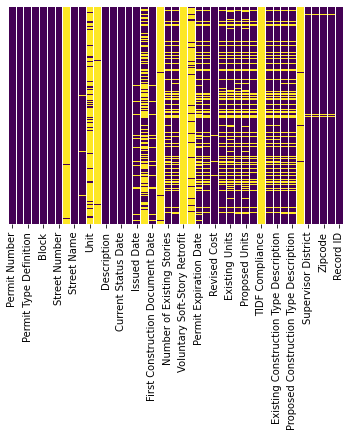

In [30]:
sns.heatmap(build.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem.

In [11]:
# how many total missing values do we have?
total_cells = np.product(build.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

26.26002315058403


## Check Why the Data is Missing?
Look at the columns **"Street Number Suffix"** and **"Zipcode"** from the San Francisco Building Permits dataset. Both of these contain missing values.

* Which, if either, are missing because they don't exist?
* Which, if either, are missing because they weren't recorded?

In [19]:
print(len(build))

198900


## Drop the Missing Value
If you're sure you want to drop rows with missing values, pandas does have a handy function, dropna() to help you do this. Let's try it out on our NFL dataset!

In [20]:
# remove all the rows that contain a missing value
build.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


Better, if we Remove all the columns that have at least one missing value instead.

In [21]:
# remove all columns with at least one missing value
columns_with_na_dropped = build.dropna(axis=1)
columns_with_na_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [22]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % build.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12


We've lost quite a bit of data, but at this point we have successfully removed all the NaN's from our data.

## Filling Missing Values

In [24]:
# get a small subset of the dataset
subset_build_data = build.loc[:, 'Street Number Suffix':'Zipcode'].head()
subset_build_data

,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,...,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,...,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0
1,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,...,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0
2,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,...,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0
3,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,...,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0
4,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,...,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0


We can use the Panda's fillna() function to fill in missing values in a dataframe for us. One option we have is to specify what we want the NaN values to be replaced with. 

In [25]:
# replace all NA's with 0
subset_build_data.fillna(0)

,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,...,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,0,Ellis,St,0.0,0,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,...,2.0,0,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0
1,0,Geary,St,0.0,0,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,...,2.0,0,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0
2,0,Pacific,Av,0.0,0,installation of separating wall,withdrawn,09/26/2017,05/27/2016,0,...,2.0,0,1.0,constr type 1,1.0,constr type 1,0,3.0,Russian Hill,94109.0
3,0,Pacific,Av,0.0,0,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,...,2.0,0,5.0,wood frame (5),5.0,wood frame (5),0,3.0,Nob Hill,94109.0
4,0,Market,St,0.0,0,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,...,2.0,0,3.0,constr type 3,0.0,0,0,6.0,Tenderloin,94102.0


Or Better, replace missing values with whatever value comes directly after it in the same column.

In [26]:
subset_build_data.fillna(method='bfill', axis=0).fillna(0)

,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,...,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,0.0,Ellis,St,0.0,0.0,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,...,2.0,0.0,3.0,constr type 3,1.0,constr type 1,0.0,3.0,Tenderloin,94102.0
1,0.0,Geary,St,0.0,0.0,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,...,2.0,0.0,3.0,constr type 3,1.0,constr type 1,0.0,3.0,Tenderloin,94102.0
2,0.0,Pacific,Av,0.0,0.0,installation of separating wall,withdrawn,09/26/2017,05/27/2016,07/18/2017,...,2.0,0.0,1.0,constr type 1,1.0,constr type 1,0.0,3.0,Russian Hill,94109.0
3,0.0,Pacific,Av,0.0,0.0,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,...,2.0,0.0,5.0,wood frame (5),5.0,wood frame (5),0.0,3.0,Nob Hill,94109.0
4,0.0,Market,St,0.0,0.0,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,...,2.0,0.0,3.0,constr type 3,0.0,0,0.0,6.0,Tenderloin,94102.0
